In [26]:
#Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = 'Kosj5SkJQIwVMDCZsQn6uVSJ3'
consumer_secret = '7WshkaiZoBeXgsDwIb68ZsjJ8E5KflcXPHP5tokRC9gRl5X1Xi'
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)


access_token = '942946531027460096-arfBVpeTExGYB05xEEerckybcUdKdxO'
access_token_secret = 'UPYHQYgiPSeowNoIeq6nLj2E4jLXdQzzTSRfvaeDHiPAH'
auth.set_access_token(access_token,access_token_secret)

api=tweepy.API(auth, parser=tweepy.parsers.JSONParser())


# Target Search Term
target_terms = ("@BBC", "@CNN", "@CBS",
                "@Fox", "@NewYorkTimes")


# Array to hold sentiment
sentiment_array = []
d=[]
tweets=[]
tweet_time=[]




# Variable for holding the oldest tweet
oldest_tweet = ""

# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweetsago=[]
    tweet_time=0
    

    # Run search around each tweet
    public_tweets = api.search(target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
    for tweet in public_tweets["statuses"]:
        
       
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweet_text=tweet["text"]
        date_tweet=tweet['created_at']
        tweet_time=tweet_time+1
       
        
    
                # Add each value to the appropriate array
        compound_list.append(compound)
        #print(compound_list)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        tweetsago.append(tweet_time)
        
        d.append({'Source_Account': target, 'Compound': compound, 'Positive':pos,'Negative':neg, 'Neutral':neu, 'Tweets':tweet_text, 'Timestamp':date_tweet,'Tweets_Ago':tweet_time})

    # Store the Average Sentiments
    sentiment = {"User": target,
                 "Compound": np.mean(compound_list),
                 "Positive": np.mean(positive_list),
                 "Neutral": np.mean(negative_list),
                 "Negative": np.mean(neutral_list),
                 "Tweet_Count":len(tweetsago)}

    # Print the Sentiments
    print(sentiment)
    print("")
    
    
    
df=pd.DataFrame(d)

print(df)



    
    

{'User': '@BBC', 'Compound': 0.17999400000000002, 'Positive': 0.1321, 'Neutral': 0.043589999999999997, 'Negative': 0.8243100000000001, 'Tweet_Count': 100}

{'User': '@CNN', 'Compound': 0.0021050000000000031, 'Positive': 0.094899999999999998, 'Neutral': 0.080159999999999995, 'Negative': 0.82491000000000014, 'Tweet_Count': 100}

{'User': '@CBS', 'Compound': -0.011852999999999997, 'Positive': 0.062100000000000002, 'Neutral': 0.059149999999999994, 'Negative': 0.87878000000000001, 'Tweet_Count': 100}

{'User': '@Fox', 'Compound': -0.047030999999999989, 'Positive': 0.048380000000000006, 'Neutral': 0.055320000000000008, 'Negative': 0.89629999999999999, 'Tweet_Count': 100}

{'User': '@NewYorkTimes', 'Compound': 0.08656999999999998, 'Positive': 0.065879999999999994, 'Neutral': 0.032570000000000009, 'Negative': 0.90154000000000001, 'Tweet_Count': 100}

     Compound  Negative  Neutral  Positive Source_Account  \
0      0.4404     0.000    0.828     0.172           @BBC   
1      0.2263     0.177

In [45]:
result_BBC=df.loc[df['Source_Account'] == '@BBC']
#print(result_BBC.head())

BBC_Compound=np.mean(result_BBC['Compound'])

print(BBC_Compound)



result_CNN=df.loc[df['Source_Account'] == '@CNN']

CNN_Compound=np.mean(result_CNN['Compound'])

print(CNN_Compound)


result_CBS=df.loc[df['Source_Account'] == '@CBS']

CBS_Compound=np.mean(result_CBS['Compound'])

print(CBS_Compound)


result_Fox=df.loc[df['Source_Account'] == '@Fox']

Fox_Compound=np.mean(result_Fox['Compound'])

print(Fox_Compound)

result_NYT=df.loc[df['Source_Account'] == '@NewYorkTimes']

NYT_Compound=np.mean(result_NYT['Compound'])

print(NYT_Compound)



0.17999400000000002
0.002105000000000003
-0.011853000000000008
-0.04703099999999998
0.08657


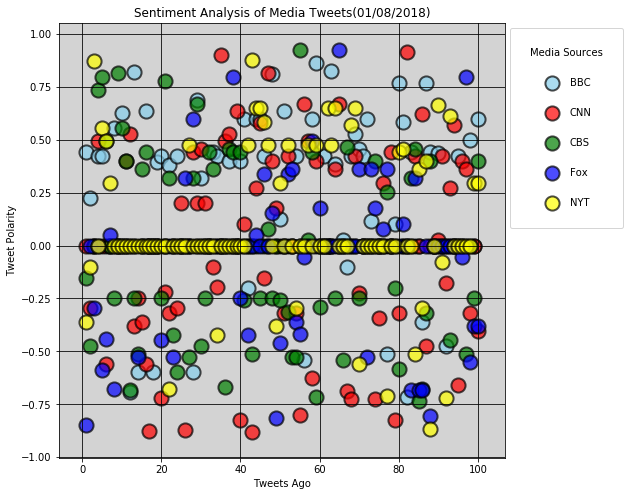

In [72]:
ax=result_BBC.plot.scatter(x='Tweets_Ago', y='Compound',color='skyblue',s=200,label='BBC',alpha=0.7, edgecolor='black',linewidth=2.0)

result_CNN.plot.scatter(x='Tweets_Ago', y='Compound', color='red',s=200,ax=ax,label='CNN',alpha=0.7, edgecolor='black',linewidth=2.0)

result_CBS.plot.scatter(x='Tweets_Ago', y='Compound', color='green',s=200,ax=ax,label='CBS',alpha=0.7, edgecolor='black',linewidth=2.0)

result_Fox.plot.scatter(x='Tweets_Ago', y='Compound', color='blue',s=200,ax=ax,label='Fox',alpha=0.7, edgecolor='black',linewidth=2.0)

result_NYT.plot.scatter(x='Tweets_Ago', y='Compound', color='yellow',s=200,ax=ax,label='NYT',alpha=0.7, edgecolor='black',linewidth=2.0)

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets" + "("+dt.datetime.today().strftime("%m/%d/%Y")+")")
ax.legend(loc='best', borderpad=2,labelspacing=2, title='Media Sources', bbox_to_anchor=(1, 1))
plt.grid(True,color='black')
ax.set_facecolor("lightgrey")

plt.savefig('Sentiment_MediaTweets.png', dpi=100)

plt.show()






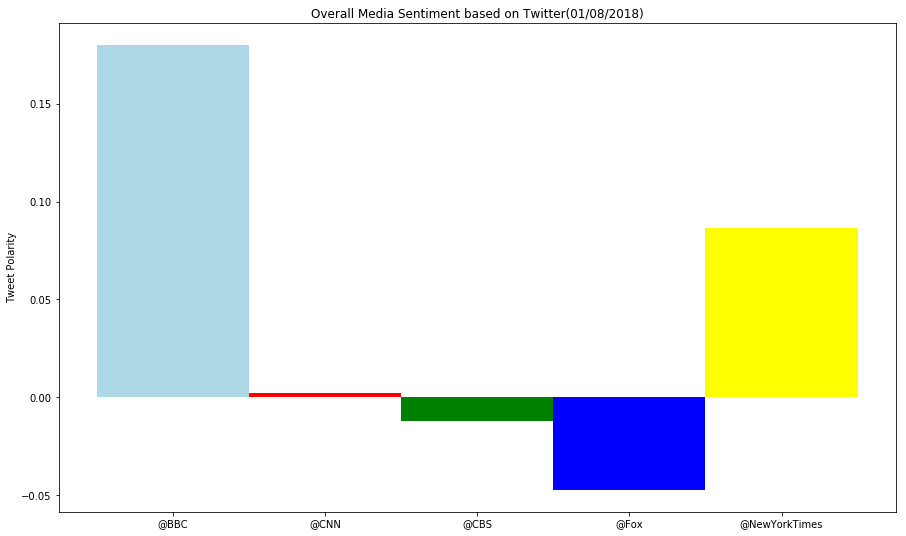

In [73]:
target_terms = ("@BBC", "@CNN", "@CBS",
                "@Fox", "@NewYorkTimes")


x_values = np.arange(len(target_terms))
y_values=[BBC_Compound, CNN_Compound, CBS_Compound, Fox_Compound, NYT_Compound]
colors=['lightblue','red','green','blue','yellow']


plt.title("Overall Media Sentiment based on Twitter" + "("+dt.datetime.today().strftime("%m/%d/%Y")+")")
plt.xlabel("")
plt.ylabel("Tweet Polarity")

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 8
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

plt.bar(x_values, y_values,color=colors, tick_label=target_terms,width=1)

plt.savefig('OverallMedia_Sentiment.png', dpi=100)

  
plt.show()